##  Regresja liniowa

Regresja liniowa to tworzenie modeli przedstawiających wielkość, której wartość chcemy przewidzieć (zmienna zależna) jako kombinację liniową predyktorów (zmiennych zależnych).

Struktura modelu ma postać

$$\tilde{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

lub w formie macierzowej 

$$\tilde{\mathbf{y}} = \mathbf{[1\  X ]} \beta$$

gdzie wektor wartości zmiennych zależnych jest przewidywany na podstawie macierzy danych i wektora współczynników $\beta$.

Współczynnik $\beta_0$ w nomentkalturze anglojęzycznej jest nazywany *intercept* ponieważ jest to punkt przecięcia się z osią $y$ gdy wszystkie predyktory są równe 0.

Aby wyznaczyć parametry modelu liniowego potrzebujemy wektora danych uczących, tj. znanych nam wartości zmiennej zależnej  $\mathbf{y}$ oraz odpowiadająxcej mu macierzy predyktorów $\mathbf{X}$. Macierz predyktorów nosi nazwę *design matrix*, i bardzo użytyeczne do jej wyznaczenia (w oparciu o dane w forme dataframe) jest pakiet [patsy](https://patsy.readthedocs.io/en/latest/quickstart.html), a w szczególności funkcja ```dmatrices```.


Model regresyjny ma mocne umocowanie statystyczne, jednak w ramach zajęć będziemy traktować go machinistycznie jak jedną z metod uczenia maszynowego. Do tworzenia takich modeli służy klasa ```LinearRegression```

Do analizy regresji liniowej wykorzystywać będziemy pakiet ```scikit-learn``` oraz zawarte w nim klasy, głównie w modułach ```linear_model```, ```metrics``` oraz ```model_selection```. 

### Dane uczące i dane testowe

Zazwyczaj rozwiązując problem nie mamy dostępu do dodatkowych danych testowych uzupełniających nasze dane uczące. Dlatego też, popularną praktyką jest podzielenie posiadanego zbioru danych w sposób losowy na dwa zbiory: uczący i testowy. Do tego służy funkcja ```train_test_split``` z modułu ```model_selection```. 



### Zadanie 1
Na podstawie danych zawartych w pliku SCORES.csv wykonaj i oceń regresję liniową, gdzie Twoją daną niezależną (predyktorem) będą godziny poświęcone na przygotowanie, a wynikową uzyskane punkty. Wykonanie zadania powinno składać się z następujących kroków:
1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytaj dane z pliku SCORES.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Wykonaj wstępny wykres uzyskanych danych (typu "scatter")
4. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (30%)
5. Utwróz model regresji liniowej za pomocą sklearn.
6. Wypisz i przeanalizuj wyliczone wskaźniki dla modelu: coef_ oraz intercept_. Czym one są i do czego służą?
7. Wykorzystając stworozny model dokonaj predykcji dla części testowej X. Porównaj wynik (y_pred) z posiadanymi danymi (y_test).
8. Wykonaj wykres konfrontujący dane testowe (X_test, y_test; typu "scatter") oraz predykcje (X_test, y_pred; linia prosta)
9. Dokonaj walidacji uzyskanych predykcji wykorzystując metryki: średni błąd bezwzględny (Mean Absolute Error), błąd średniokwadratowy (Mean Squared Error) oraz pierwiastek błędu średniokwadratowego (Root Mean Squared Error).

Następnie utworzony skrypt wykorzystaj na danych zawartych w SBP.csv, gdzie predyktorem będzie wiek, a wynikiem ciśnienie (SBP). Czy uzyskane wyniki z modelu są równie zadowalające?

In [126]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv("SCORES.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [127]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [128]:
df.shape

(25, 2)

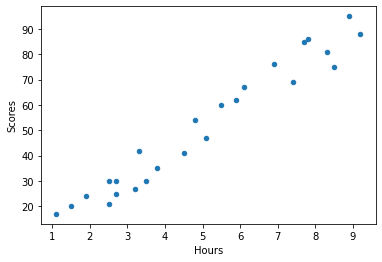

In [129]:
scatter = df.plot.scatter(x='Hours', y='Scores')

In [130]:
import numpy as np
X = np.array(df[['Hours']])
y = np.array(df['Scores'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train

array([[6.1],
       [8.3],
       [1.5],
       [8.5],
       [1.9],
       [3.5],
       [3.8],
       [2.7],
       [4.8],
       [5.1],
       [9.2],
       [7.4],
       [2.5],
       [8.9],
       [5.9],
       [2.7],
       [5.5]])

In [131]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


LinearRegression()

In [132]:
lin_reg.coef_, lin_reg.intercept_

# coef_ i intercept_ odpowiadają za a i b we wzorze na funkcje liniowa y = ax+b

(array([9.51800129]), 2.5035580066267826)

In [133]:
y_pred = lin_reg.predict(X_test)
y_pred

array([75.79216794, 32.96116213, 12.97335943, 76.74396807, 68.17776691,
       45.33456381, 33.91296226, 26.29856123])

In [134]:
y_test

array([85, 27, 17, 86, 76, 41, 42, 30])

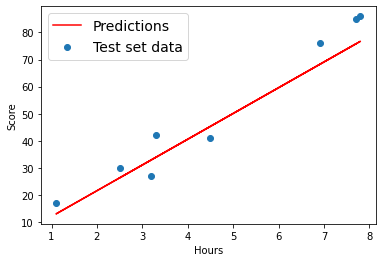

In [135]:
plt.scatter(X_test, y_test, label='Test set data')
plt.plot(X_test, y_pred, 'r', label='Predictions')
plt.xlabel("Hours")
plt.ylabel("Score")
plt.legend(loc='upper left', fontsize=14)

In [136]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mea = mean_absolute_error(y_test, y_pred)
mse, rmse, mea

(47.66052363246122, 6.903660162005457, 6.549617514287624)

In [137]:
r_2 = lin_reg.score(X_test, y_test)
r_2

0.928838337241566

In [138]:
sbp = pd.read_csv("SBP.csv")
sbp

,Age,SBP
0,60,117
1,61,120
2,74,145
3,57,129
4,63,132
5,68,130
6,66,127
7,77,163
8,63,136
9,54,115


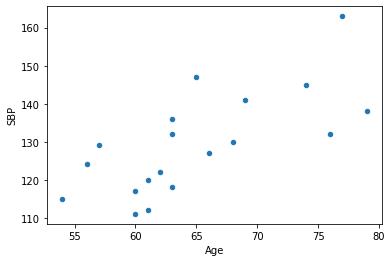

In [139]:
scatter = sbp.plot.scatter(x='Age', y='SBP')

In [140]:
X = np.array(sbp[['Age']])
y = np.array(sbp['SBP'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [141]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [142]:
y_pred = lin_reg.predict(X_test)
y_pred

array([133.80482204, 125.74512055, 129.7749713 , 151.26750861,
       127.08840413, 125.74512055])

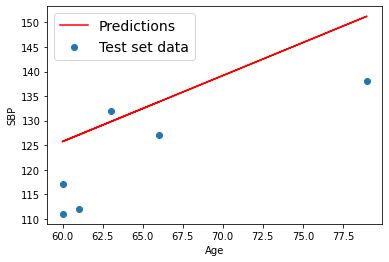

In [143]:
plt.scatter(X_test, y_test, label='Test set data')
plt.plot(X_test, y_pred, 'r', label='Predictions')
plt.xlabel("Age")
plt.ylabel("SBP")
plt.legend(loc='upper left', fontsize=14)

In [144]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mea = mean_absolute_error(y_test, y_pred)
mse, rmse, mea

# Uzyskane wyniki nie są zadawalące, wynika to z niewielkiej ilości danych testowych, a także z duzego rozstrzału
# znajdujących się na  wykresie punktów, rozwiazaniem problemu byloby powiekszenie zbioru posiadanych danych lub 
# uzycie mocniejszego modelu, byc moze regresja wielomianowa lepiej dopasowałaby się do zbioru punktów.

(124.80646555265695, 11.171681411168908, 10.146000765403747)

In [145]:
r_2 = lin_reg.score(X_test, y_test)
r_2

-0.20231007757443153

### Zadanie 2
Na podstawie danych zawartych w pliku PETROL.csv wykonaj i oceń regresję liniową. Jako daną zależną wykorzystaj zużycie paliwa, a pozostałe - jako predyktory. Wykonanie zadania powinno składać się z kroków podobnych do tych z zadania poprzedniego.

Czy uzyskane wyniki predykcji modelu są dobre? Co mogło mieć pozytywny/negatywny wpływ na taki wynik?

In [146]:
petrol = pd.read_csv("PETROL.csv")
petrol.head()

,Podatek_paliwowy,Sredni_przychod,Utwardzone_autostrady,Procent_ludnosci_z_prawem_jazdy,Zuzycie_paliwa
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [147]:
y = np.array(petrol[['Zuzycie_paliwa']])
X = np.array(petrol[['Podatek_paliwowy', 'Sredni_przychod', 'Utwardzone_autostrady', 'Procent_ludnosci_z_prawem_jazdy']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [148]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [149]:
y_pred = lin_reg.predict(X_test)
y_pred

array([[498.23300928],
       [422.12486201],
       [695.76236345],
       [629.47859009],
       [493.26856069],
       [561.32128731],
       [516.86240179],
       [562.60687543],
       [650.67575802],
       [306.70033269],
       [498.77185461],
       [708.72703365],
       [481.64078845],
       [402.53627696],
       [610.79354596]])

In [150]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mea = mean_absolute_error(y_test, y_pred)
mse, rmse, mea

(2265.99067236723, 47.60242296739978, 40.62043878925238)

In [151]:
r_2 = lin_reg.score(X_test, y_test)
r_2

0.8216463173380619

### Regresja logistyczna

Naturalnym rozwojem modeli linowych, są uogólnione modele liniowe (*generalized linear models*). 

Ich przewodnią ideą jest to, że zamiast reprezentować zmienną zależną jako kombinację liniową niezależnych, staramy się stworzyć model liniowy pewnej funkcji zmiennej zależnej.

$$ f(y) =  \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

wymaga się, aby funkcja ta była odwracalna, dzięki czemu 

$$ y = f^{-1} ( \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n)$$

Takie przekształcenie stosujemy wtedy, gdy zbiór wartości zmiennej zależnej nie jest całym zbiorem liczb rzeczywistych tylko jest w jakiś sposób ograniczony. Na przykład do przedziału $[0,1]$, do wartości dodatnich lub wartości całkowitych. W tens posób można wybrać funkcję $f$, której dziedziną jest zbiór wartości $y$ zaś obrazem jest zbiór liczb rzeczywistych.

Jedną z takich funkcji jest tzw. funkcja logistyczna, która odpowiada zbiorowi $[0,1]$ przez co często jest wykorzystywana do analizy prawdopodobieństwa przynależności do danej klasy, lub też inaczej jako klasyfikator.

W takiej sytuacji zmienne zależne powinny przyjmować wyłącznie wartości $0$ i $1$ co odpowiada temu czy dany punkt należy do interesującej klasy. Model logistyczny poznwala na określenie estymaty prawdopodobieństwa, czy punkt należy czy nie do danej klasy. 

Do tworzenia modeli logistycznyc służy klasa: ```LogisticRegression```

### Zadanie 3

Na podstawie danych zawartych w pliku HEART.csv wykonaj i oceń regresję logistyczną, gdzie Twoją daną zależną jest kolumna "num". Wykonanie zadania powinno składać się z następujących kroków:

1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytanie danych z pliku HEART.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Przetworzenie danych, tj: oznaczenie braku danych ("?") na NaN, usunięcię kolumn zawierających zbyt dużo brakujących danych (3 kolumny), usunięcie wierszy z brakującymi wartościami.
4. Zakoduj niezależne zmienne kategorialne np: jako wartości "dummy", za pomoca metody get_dummies(). Zmienne kategorialne to takie, które reprezentuja przynależność do kategorii. W przypadku naszych odfiltrowanych danych będą to kolumny: cp, restecg, fbs, sex, exang. Jako, że trzy ostatnie już zapisane są w formie 0 i 1 tylko cp i restecg wymagają tej operacji.
5. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zależnych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (20%).
6. Utwróz model regresji logistycznej.
7. Oceń wynik za pomocą dostępnych metryk (np: metody związane z modelem czy classification_report() z sklearn)

Możesz również spróbować ustandaryzować dane (np: poprzez skalowanie) po podziale na zbiory treningowy i testowy.

In [176]:
heart = pd.read_csv("HEART.csv")
heart.describe()

,age,sex,cp,oldpeak,num
count,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,0.586054,0.360544
std,7.811812,0.447533,0.965117,0.908648,0.480977
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,5.000000,1.000000


In [177]:
heart.replace('?', np.nan, inplace=True)
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,NaN,NaN,NaN,0
1,29,1,2,120,243,0,0,160,0,0.0,NaN,NaN,NaN,0
2,29,1,2,140,NaN,0,0,170,0,0.0,NaN,NaN,NaN,0
3,30,0,1,170,237,0,1,170,0,0.0,NaN,NaN,6,0
4,31,0,2,100,219,0,1,150,0,0.0,NaN,NaN,NaN,0


In [178]:
heart.drop(['slope', 'ca', 'thal'], axis=1, inplace=True)
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
2,29,1,2,140,NaN,0,0,170,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0


In [204]:
heart.dropna(inplace=True)
heart.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,num,cp,restecg_0,restecg_1,restecg_2
0,28,1,130,132,0,185,0,0.0,0,2,0,0,1
1,29,1,120,243,0,160,0,0.0,0,2,1,0,0
3,30,0,170,237,0,170,0,0.0,0,1,0,1,0
4,31,0,100,219,0,150,0,0.0,0,2,0,1,0
5,32,0,105,198,0,165,0,0.0,0,2,1,0,0


In [210]:
dummies = pd.get_dummies(heart['cp'])
heart = pd.concat([heart.drop(['cp'],axis=1), dummies],axis=1)


In [221]:
heart
heart.columns

Index([       'age',        'sex',   'trestbps',       'chol',        'fbs',
          'thalach',      'exang',    'oldpeak', 'num       ',  'restecg_0',
        'restecg_1',  'restecg_2',            1,            2,            3,
                  4],
      dtype='object')

In [226]:
y = np.array(heart['num       '])
X = np.array(heart[['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'restecg_0', 'restecg_1', 'restecg_2', 1, 2, 3, 4]])


In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [228]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train) 

/home/user/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [229]:
log_reg.score(X_test, y_test)

0.8679245283018868

In [ ]:
# Po standaryzacji:

In [233]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [234]:
log_reg.fit(X_train_scaled, y_train)


LogisticRegression()

In [236]:
log_reg.score(X_test_scaled, y_test)

0.7735849056603774